<a href="https://colab.research.google.com/github/skm08/ANN/blob/main/TBR_Runs_ANN_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import Necessary Modules

First of all, we need to import some Python Libraries; Numpy and Pandas will facilitate us to analyse and manipulation of our data, Matplotlib and Seaborn for data visualization to find out any anomaly in dataset.

Additionaly, we need some other Python Libraries to build our Artificial Neural Network(ANN), in that case we will use  Tensorflow, Keras and Scikit-Learn.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras.optimizers import Adam

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error,mean_absolute_error,explained_variance_score

from tensorflow.keras.models import load_model

# Read The Dataset
Now we have to read and load the complete dataset with Python. We will use CSV file format and make Pandas to read and load the Dataset.

We have 5 columns and 368 rows. Make sure there are no Missing Values in the dataset. We will train our ANN Model with these data and after that make the Trained Model predict the Sulfer Conversion Percentage.

In [ ]:
df = pd.read_csv('TBR_Combined.csv')

In [ ]:
df.head()

,LSHV,P,T,Wt,Sulfur_Conversion
0,1,1,80,0.4012,45.50
1,1,1,90,0.3163,57.03
2,1,1,100,0.2340,68.21
3,1,1,110,0.1996,72.88
4,1,1,120,0.1671,77.30


In [ ]:
df.shape

(368, 5)

In [ ]:
df.columns

Index(['LSHV', 'P', 'T', 'Wt', 'Sulfur_Conversion'], dtype='object')

# Seperate The Sulfer Conversion Column
In this state we are going to spilt up the dataset. We will keep the Sulfer Conversion Column in 'y' variable and rest of the data in 'X' variable. This is because Sulfer Conversion Column is our target column that we our ANN Model is going to predict.

In [ ]:
X = df.drop('Sulfur_Conversion',axis=1)
y = df['Sulfur_Conversion']

# Train and Test Section
Now we will use Scikit-Learn to split again out dataset into Train and test section.

We have 368 rows and will take 20 percent that is 368 * 0.2 = 73 Rows for out Testing purpose. More clearly, We will use 80% of total data to train our ANN Model and rest 20% data will use to evaluate the Model Performence.

Official documentation:
https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=101)

# Normalization
Now we are going to scale our train and test data, for this we will use MinMaxScaler function from Scikit-Learn. Note that we use we have to use Fit and Transform to scale our Train dataset but use only Transform function for Train dataset.

**Official documentation:**
https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.MinMaxScaler.html

In [ ]:
scaler = MinMaxScaler()

In [ ]:
X_train= scaler.fit_transform(X_train)

In [ ]:
X_test = scaler.transform(X_test)

# ANN Model
The most amazing part we are going to do now. Till now we have preprocessed out dataset to feed into ANN Model. Now we will use Tensorflow and Keras to build the ANN Model. Here we used 5 layers with 5 Neurons along with Activation, Optimizer and Loss function that will facilate us to evaluate our Model performence.

Official Documentation:
https://keras.io/guides/sequential_model/

In [ ]:
model = Sequential()

model.add(Dense(5,activation='relu'))
model.add(Dense(5,activation='relu'))
model.add(Dense(5,activation='relu'))
model.add(Dense(5,activation='relu'))
model.add(Dense(1))

model.compile(optimizer='adam',loss='mse')

# Train the Model
The crucial part here is to set batch size and number of epochs. Batch size means how much data we allow the model to train at a time. You can check the performance by changing the parameters. Of course make sure to use GPU to make faster training. Don't hesitate to knock me if you encounter any problem.

In [ ]:
model.fit(x=X_train,y=y_train.values,
          validation_data=(X_test,y_test.values),
          batch_size=4,epochs=400)

Epoch 1/400
74/74 [==============================] - 5s 7ms/step - loss: 3692.3384 - val_loss: 3898.1946
Epoch 2/400
74/74 [==============================] - 0s 5ms/step - loss: 3622.4775 - val_loss: 3792.3086
Epoch 3/400
74/74 [==============================] - 0s 5ms/step - loss: 3423.1270 - val_loss: 3431.1853
Epoch 4/400
74/74 [==============================] - 0s 4ms/step - loss: 2734.9321 - val_loss: 2309.6130
Epoch 5/400
74/74 [==============================] - 0s 4ms/step - loss: 1375.6500 - val_loss: 830.4892
Epoch 6/400
74/74 [==============================] - 0s 4ms/step - loss: 449.7809 - val_loss: 401.5500
Epoch 7/400
74/74 [==============================] - 0s 5ms/step - loss: 329.0794 - val_loss: 351.5880
Epoch 8/400
74/74 [==============================] - 0s 4ms/step - loss: 294.4169 - val_loss: 316.9714
Epoch 9/400
74/74 [==============================] - 0s 4ms/step - loss: 263.5977 - val_loss: 281.9245
Epoch 10/400
74/74 [==============================] - 0s 4ms/ste

# Loss Function
There plot the true loss and validation los. The good thing is it doesn't fluctuate much. If the deviation is more then we should rebuild the Model until the result is good.

In [ ]:
losses = pd.DataFrame(model.history.history)

<Axes: >

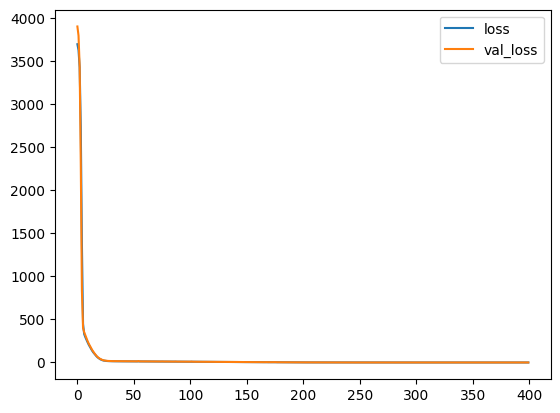

In [ ]:
losses.plot()

# Prediction
Now it's time to predict the new Sulfer Conversion Percentage. Remember we put aside 20% of our dataset? Go ahead to use that 20% data to predict from the ANN Model and check how accurately it can predict.

In [ ]:
predictions = model.predict(X_test)

3/3 [==============================] - 0s 3ms/step


# R2 Score
the R2 Score is arround 0.99. Note that max score is 1.

Documentation:
https://scikit-learn.org/stable/modules/generated/sklearn.metrics.r2_score.html

In [ ]:
from sklearn.metrics import r2_score

In [ ]:
r2_score(y_test, predictions)

0.9999980102852946

# Mean Absolute Error
Anothe metric we will use to evaluate the Model Performance is Mean Absolute Error. Here we found the Error is 0.015 x 100 = 1.5 % which is pretty amazing.

Documention:
https://scikit-learn.org/stable/modules/generated/sklearn.metrics.mean_absolute_error.html

In [ ]:
mean_absolute_error(y_test,predictions)

0.015051430367134595

# Root Mean Squared Error
Our 3rd metric is Root Mean Squared Error which is around (0.018 x 100 = 1.8 %), pretty impressive.

Documentation:
https://scikit-learn.org/stable/modules/generated/sklearn.metrics.mean_squared_error.html

In [ ]:
np.sqrt(mean_squared_error(y_test,predictions))

0.018553419807967673

In [ ]:
explained_variance_score(y_test,predictions)

0.9999992348051051

# Prediction vs True Results

Here red line represents the Predicted Results from our ANN Model and Blue dots are representing the actual results. We see the both results are pretty close. That means our Model Predicts nearly actual results.

So we can consider that our Model can Predict Sulfer Conversion with around 98% accuracy.

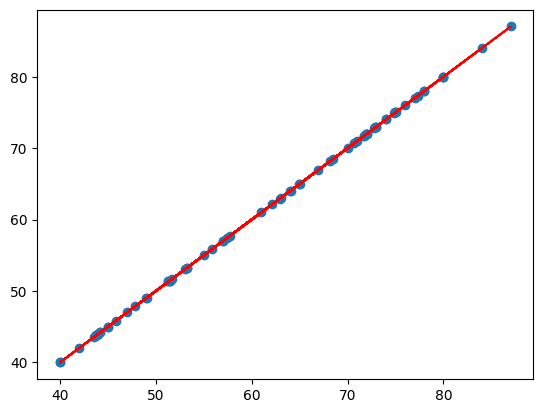

In [ ]:
# Our predictions
plt.scatter(y_test,predictions)

# Perfect predictions
plt.plot(y_test,y_test,'r')

# User Section to Predict any new raw data

This section is for the USER to resue the ANN Model. Put all you data ('LSHV', 'P', 'T', 'Wt') in this CSV file "raw_data_for_prediction.csv" and run the Google Colab with GPU, after that you will get the Predicted Sulfer Conversion Percentage.

In [ ]:
test_data=pd.read_csv('raw_data_for_prediction.csv')

In [ ]:
ans = scaler.transform(test_data)

In [ ]:
ans

array([[ 7.50000000e-01,  5.00000000e-01,  7.50000000e-01,
         4.35597826e-01],
       [ 1.00000000e+00,  5.00000000e-01,  7.50000000e-01,
         4.99728261e-01],
       [ 0.00000000e+00,  5.00000000e-01,  1.00000000e+00,
        -2.71739130e-04],
       [ 2.50000000e-01,  5.00000000e-01,  1.00000000e+00,
         9.94565217e-02],
       [ 5.00000000e-01,  5.00000000e-01,  1.00000000e+00,
         1.99456522e-01],
       [ 7.50000000e-01,  5.00000000e-01,  1.00000000e+00,
         3.19836957e-01],
       [ 1.00000000e+00,  5.00000000e-01,  1.00000000e+00,
         3.60054348e-01]])

# Predicted Sulfer Conversion Percentage
This is the Predicted Sulfer Conversion Percentage from ANN Model base on the data you provided in the CSV file above (raw_data_for_prediction.csv).

In [ ]:
model.predict(ans)

1/1 [==============================] - 0s 26ms/step


array([[68.22689 ],
       [65.02032 ],
       [90.02494 ],
       [85.037964],
       [80.0374  ],
       [74.017525],
       [72.006935]], dtype=float32)

# Thank You
Thanks a lot to give me the opportunity to work with you. Feel free to knock if you are stuck at any point.